#Taxi Fare Predictor

**Description -**
- As target variable is already known, we treat this as a Supervised Learning problem.
- Fare is a continuous real variable, so regression models will be used.
- As Taxi Fare is extremely dependent on Fuel price, we have used a public dataset which includes weekly average of fuel prices in New York City

**Steps -**
1. Downloading dataset, Installing packages & Loading dataset
2. Exploratory Data Analysis & Visualization
3. Preparing the dataset for Machine Learning
4. Training Hardcoded & Baseline Models
5. Feature Engineering
6. Training & Evaluating Different Models
7. Predicting Fares for test data & Creating the submission file

##1. Downloading dataset, Installing packages & Loading dataset

###Installing packages & downloading dataset

In [269]:
!pip install opendatasets --quiet

In [270]:
import opendatasets as od

In [271]:
download_url = 'https://www.kaggle.com/competitions/new-york-city-taxi-fare-prediction/'
download_url_fuel = 'https://www.kaggle.com/datasets/new-york-state/nys-diesel-retail-price-weekly-average'

Upload the kaggle API key json file from kaggle or input the username & API key when asked after running the following two cells

In [272]:
od.download(download_url)

Skipping, found downloaded files in "./new-york-city-taxi-fare-prediction" (use force=True to force download)


In [273]:
od.download(download_url_fuel)

Skipping, found downloaded files in "./nys-diesel-retail-price-weekly-average" (use force=True to force download)


###Viewing Dataset Files

In [274]:
data_dir = 'new-york-city-taxi-fare-prediction/'

In [275]:
data_dir_fuel = 'nys-diesel-retail-price-weekly-average/'

In [276]:
!ls -lh {data_dir} #'!' means run the command in shell

total 5.4G
-rw-r--r-- 1 root root  486 Jul 10 04:34 GCP-Coupons-Instructions.rtf
-rw-r--r-- 1 root root 336K Jul 10 04:34 sample_submission.csv
-rw-r--r-- 1 root root 960K Jul 10 04:34 test.csv
-rw-r--r-- 1 root root 5.4G Jul 10 04:35 train.csv


In [277]:
!wc -l {data_dir}train.csv

55423856 new-york-city-taxi-fare-prediction/train.csv


In [278]:
!wc -l {data_dir}test.csv

9914 new-york-city-taxi-fare-prediction/test.csv


In [279]:
!wc -l {data_dir}sample_submission.csv

9915 new-york-city-taxi-fare-prediction/sample_submission.csv


In [280]:
!head {data_dir}train.csv

key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.84161,40.712278,1
2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.76127,-73.991242,40.750562,2
2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.98713,40.733143,-73.991567,40.758092,1
2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
2011-01-06 09:50:45.0000002,12.1,2011-01-06 09:50:45 UTC,-74.000964,40.73163,-73.972892,40.758233,1
2012-11-20 20:35:00.0000001,7.5,2012-11-20 20:35:00 UTC,-73.980002,40.751662,-73.973802,40.764842,1
2012-01-04 17:22:00.00000081,16.5,2012-01-04 17:22:00 UTC,-73.9513,40.774138,-73.990095,40.751048,1
2012-12-03 13:10:00.000000125,9,2012-12-03 13:10:00 UTC,-74.006462,40.726713,-73.99

In [281]:
!head {data_dir}test.csv

key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320007324219,40.7638053894043,-73.981430053710938,40.74383544921875,1
2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862182617188,40.719383239746094,-73.998886108398438,40.739200592041016,1
2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.75126,-73.979654,40.746139,1
2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.98116,40.767807,-73.990448,40.751635,1
2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1
2012-12-01 21:12:12.0000005,2012-12-01 21:12:12 UTC,-73.960983,40.765547,-73.979177,40.740053,1
2011-10-06 12:10:20.0000001,2011-10-06 12:10:20 UTC,-73.949013,40.773204,-73.959622,40.770893,1
2011-10-06 12:10:20.0000003,2011-10-06 12:10:20 UTC,-73.777282,40.646636,-73.985083,40.759368,1
2011-10-06 12:10:20.0000002,2011-10-06 12:10:20 UTC,-74.01409

###Loading the dataset

In [282]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

In [283]:
cols = ('fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count').split(',')
print(cols)

['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count']


In [284]:
dtypes = {
    'fare_amount':'float32',
    'pickup_longitude':'float32',
    'pickup_latitude':'float32',
    'dropoff_longitude':'float32',
    'dropoff_latitude':'float32',
    'passenger_count':'uint8' #count can't be nagative, so we use unsigned int datatype
}

In [285]:
sample_fraction = 0.03 #We are going to use only 3% dataset
random.seed(42) #Fixing the seed to get same results everytime 

#Utility Function to randomly read only 3% rows from the csv file
def skip_row(row_idx):
  if row_idx == 0:
    return False
  else:
    return random.random() > sample_fraction

Loading the training data

In [286]:
df = pd.read_csv(
    data_dir+'train.csv',
    usecols=cols,
    parse_dates=['pickup_datetime'],
    dtype=dtypes,
    skiprows=skip_row)

In [287]:
test_df = pd.read_csv(
    data_dir+'/test.csv',
    dtype=dtypes, 
    parse_dates=['pickup_datetime'])

In [288]:
df_fuel = pd.read_csv(
    data_dir_fuel+'diesel-retail-price-weekly-average-by-region-beginning-2007.csv', 
    parse_dates=['Date'], 
    usecols=['Date', 'New York State Average ($/gal)'])

##2. Exploratory Data Analysis & Visualization

####Training Set

In [289]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,16.9,2010-01-05 16:52:16+00:00,-74.016045,40.711304,-73.979271,40.782005,1
1,8.9,2009-09-02 01:11:00+00:00,-73.980659,40.733871,-73.991539,40.758137,2
2,4.1,2009-11-06 01:04:03+00:00,-73.991600,40.744713,-73.983078,40.744682,2
3,4.0,2014-12-06 20:36:22+00:00,-73.979813,40.751904,-73.979446,40.755482,1
4,10.0,2014-11-12 12:40:29+00:00,-74.002579,40.739571,-73.994583,40.760681,1


In [290]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1661731 entries, 0 to 1661730
Data columns (total 7 columns):
 #   Column             Non-Null Count    Dtype              
---  ------             --------------    -----              
 0   fare_amount        1661731 non-null  float32            
 1   pickup_datetime    1661731 non-null  datetime64[ns, UTC]
 2   pickup_longitude   1661731 non-null  float32            
 3   pickup_latitude    1661731 non-null  float32            
 4   dropoff_longitude  1661717 non-null  float32            
 5   dropoff_latitude   1661717 non-null  float32            
 6   passenger_count    1661731 non-null  uint8              
dtypes: datetime64[ns, UTC](1), float32(5), uint8(1)
memory usage: 46.0 MB


In [291]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,1.661731e+06,1.661731e+06,1.661731e+06,1.661717e+06,1.661717e+06,1.661731e+06
mean,1.135368e+01,-7.250970e+01,3.991889e+01,-7.251003e+01,3.991955e+01,1.685489e+00
std,9.836679e+00,1.282921e+01,1.052012e+01,1.306792e+01,1.029647e+01,1.328315e+00
min,-3.000000e+02,-3.439245e+03,-3.474112e+03,-3.367929e+03,-3.474112e+03,0.000000e+00
25%,6.000000e+00,-7.399203e+01,4.073491e+01,-7.399140e+01,4.073399e+01,1.000000e+00
50%,8.500000e+00,-7.398180e+01,4.075266e+01,-7.398017e+01,4.075313e+01,1.000000e+00
75%,1.250000e+01,-7.396710e+01,4.076711e+01,-7.396368e+01,4.076806e+01,2.000000e+00
max,1.097480e+03,3.442185e+03,3.347260e+03,3.442185e+03,3.351403e+03,2.080000e+02


Time Period of Records

In [292]:
df.pickup_datetime.min(), df.pickup_datetime.max()

(Timestamp('2009-01-01 00:11:46+0000', tz='UTC'),
 Timestamp('2015-06-30 23:59:54+0000', tz='UTC'))

Distribution of number of records in each year

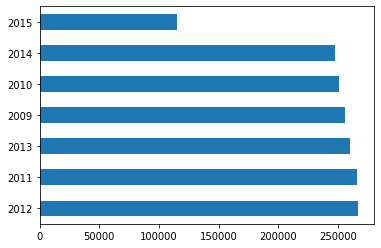

In [293]:
df.pickup_datetime.dt.year.value_counts().plot(kind='barh')

Number of rows from each year are quite uniform, except for year 2015 as the dataset was recorded till June, 2015

Percentage of weekend trips

In [294]:
len(df[df.pickup_datetime.dt.dayofweek.isin([5,6])])/len(df)*100

28.249698657604633

####Test Data

In [295]:
test_df.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24+00:00,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24+00:00,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44+00:00,-73.982521,40.751259,-73.979652,40.746140,1
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12+00:00,-73.981163,40.767807,-73.990448,40.751637,1
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12+00:00,-73.966049,40.789776,-73.988564,40.744427,1


In [296]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   key                9914 non-null   object             
 1   pickup_datetime    9914 non-null   datetime64[ns, UTC]
 2   pickup_longitude   9914 non-null   float32            
 3   pickup_latitude    9914 non-null   float32            
 4   dropoff_longitude  9914 non-null   float32            
 5   dropoff_latitude   9914 non-null   float32            
 6   passenger_count    9914 non-null   uint8              
dtypes: datetime64[ns, UTC](1), float32(4), object(1), uint8(1)
memory usage: 319.6+ KB


In [297]:
test_df.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974716,40.751041,-73.973656,40.751740,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252190,40.573143,-74.263245,40.568974,1.000000
25%,-73.992500,40.736125,-73.991249,40.735253,1.000000
50%,-73.982327,40.753052,-73.980015,40.754065,1.000000
75%,-73.968012,40.767113,-73.964062,40.768757,2.000000
max,-72.986534,41.709557,-72.990967,41.696682,6.000000


Time period of test records

In [298]:
test_df.pickup_datetime.min(),test_df.pickup_datetime.max()

(Timestamp('2009-01-01 11:04:24+0000', tz='UTC'),
 Timestamp('2015-06-30 20:03:50+0000', tz='UTC'))

28% records are of weekends

####Fuel Data

In [299]:
df_fuel.head()

,Date,New York State Average ($/gal)
0,2019-08-26,3.18
1,2019-08-19,3.19
2,2019-08-12,3.20
3,2019-08-05,3.21
4,2019-07-29,3.22


In [300]:
len(df_fuel)

618

Time period of fuel data records

In [301]:
df_fuel.Date.dt.year.min(), df_fuel.Date.dt.year.max()

(2007, 2019)

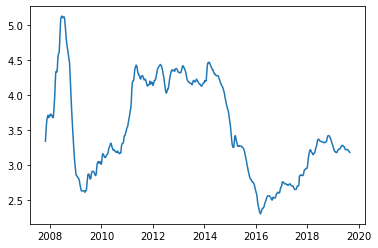

In [302]:
plt.plot(df_fuel.Date.dt.date.values,df_fuel['New York State Average ($/gal)'].values)
plt.show()

##3. Preparing the dataset for Machine Learning

###Splitting Training & Validation Set

In [303]:
X = df.iloc[:,1:].values
y = df.iloc[:,1].values

In [304]:
from sklearn.model_selection import train_test_split
train_df, val_df = train_test_split(df, test_size=0.2,random_state=42)

In [305]:
len(train_df), len(val_df)

(1329384, 332347)

###Filling/Removing Missing Values

In [306]:
print(train_df.isna().sum())
print(len(train_df))
print(val_df.isna().sum())
print(len(val_df))

fare_amount           0
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude    13
dropoff_latitude     13
passenger_count       0
dtype: int64
1329384
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64
332347


In [307]:
#As the number of missing values is very less compared to the total size of the dataset, we drop the rows with null values
train_df = train_df.dropna()
val_df = val_df.dropna()

In [308]:
train_df.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [309]:
input_cols = ['pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count']

In [310]:
target_col = 'fare_amount'

###Training

In [311]:
train_inputs = train_df[input_cols]

In [312]:
train_targets = train_df[target_col]

####Validation

In [313]:
val_inputs = val_df[input_cols]

In [314]:
val_targets = val_df[target_col]

###Testing

In [315]:
test_inputs = test_df[input_cols]

##4. Training Hardcoded & Baseline Models

- It is necessary to have a base model which will provide us the minimum performance that we should get.                                       
- We obtain that minimum performance by simply predicting the fare amount for all trips as the mean of all the fare amounts in training set.
- This will help in evaluating the performance of the models that we will build later.

In [316]:
class MeanRegressor:
  def fit(self, inputs, targets):
    self.mean = targets.mean()
    
  def predict(self, inputs):
    return np.full(inputs.shape[0],self.mean)

In [317]:
mean_model = MeanRegressor()

In [318]:
mean_model.fit(train_inputs, train_targets)

In [319]:
mean_model.mean

11.352699

In [320]:
train_preds = mean_model.predict(train_inputs)

In [321]:
from sklearn.metrics import mean_squared_error

In [322]:
def rmse(targets,preds):
  return mean_squared_error(targets, preds, squared=False)

In [323]:
train_rmse = rmse(train_targets, train_preds)

In [324]:
train_rmse

9.843743

In [325]:
val_preds = mean_model.predict(val_inputs)

In [326]:
val_rmse = rmse(val_targets, val_preds) 

In [327]:
val_rmse

9.808499

###Training a basic Linear Regression model

In [328]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(train_inputs,train_targets)

LinearRegression()

In [329]:
train_preds = linear_model.predict(train_inputs)

In [330]:
train_preds

array([11.369594, 11.637493, 11.28045 , ..., 11.459168, 11.280387,
       11.280388], dtype=float32)

In [331]:
rmse(train_targets,train_preds)

9.842572

In [332]:
val_preds = linear_model.predict(val_inputs)

In [333]:
val_preds

array([11.369747 , 11.2802925, 11.280443 , ..., 11.280327 , 11.637991 ,
       11.2805605], dtype=float32)

In [334]:
rmse(val_targets, val_preds)

9.807019

##5. Feature Engineering
  - Add Date based features like hour, is_weekend, is_holiday
  - Add distance from popular landmarks
  - Add fuel prices feature
  - Add trip distance feature

###Adding Features related to date
  - month
  - is weekend
  - hour
  - is holiday

In [335]:
import holidays

In [336]:
holidays_list = []
for item in holidays.USA(years=2016).items():
  holidays_list.append(item[0])

In [337]:
holidays_list

[datetime.date(2016, 1, 1),
 datetime.date(2016, 1, 18),
 datetime.date(2016, 2, 15),
 datetime.date(2016, 5, 30),
 datetime.date(2016, 7, 4),
 datetime.date(2016, 9, 5),
 datetime.date(2016, 10, 10),
 datetime.date(2016, 11, 11),
 datetime.date(2016, 11, 24),
 datetime.date(2016, 12, 25),
 datetime.date(2016, 12, 26)]

In [338]:
def add_dateparts(df, col):
  df['is_weekend'] = df[col].dt.day.isin([5,6])
  df['is_holiday'] = df[col].dt.date.isin(holidays_list)
  df['hour'] = df[col].dt.hour
  df['Date'] = df[col].dt.date

In [339]:
add_dateparts(train_df, 'pickup_datetime')
add_dateparts(val_df, 'pickup_datetime')
add_dateparts(test_df, 'pickup_datetime')

In [340]:
train_df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,is_weekend,is_holiday,hour,Date
1344710,7.000000,2013-06-21 19:20:00+00:00,-73.986603,40.777008,-73.983513,40.762398,2,False,False,19,2013-06-21
881046,4.500000,2014-01-09 18:36:00+00:00,-73.982513,40.775196,-73.985092,40.769451,5,False,False,18,2014-01-09
484486,6.500000,2010-11-07 06:10:00+00:00,-73.988365,40.737541,-73.990646,40.756027,1,False,False,6,2010-11-07
560794,25.299999,2009-11-02 08:07:00+00:00,-73.991158,40.749142,-73.982712,40.756866,1,False,False,8,2009-11-02
1422663,7.300000,2010-05-25 23:15:23+00:00,-73.980354,40.780384,-73.955025,40.800144,1,False,False,23,2010-05-25


###Calculate Journey Distance

In [341]:
import numpy as np

def haversine_np(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)

    All args must be of equal length.    

    """
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km

In [342]:
def add_trip_distance(df):
    df['trip_distance'] = haversine_np(df['pickup_longitude'], df['pickup_latitude'], df['dropoff_longitude'], df['dropoff_latitude'])

In [343]:
%%time
add_trip_distance(train_df)

CPU times: user 242 ms, sys: 7.99 ms, total: 250 ms
Wall time: 201 ms


In [344]:
%%time
add_trip_distance(val_df)

CPU times: user 20 ms, sys: 2.03 ms, total: 22 ms
Wall time: 24.7 ms


In [345]:
%%time
add_trip_distance(test_df)

CPU times: user 7.25 ms, sys: 6 µs, total: 7.26 ms
Wall time: 7.82 ms


In [346]:
train_df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,is_weekend,is_holiday,hour,Date,trip_distance
1344710,7.000000,2013-06-21 19:20:00+00:00,-73.986603,40.777008,-73.983513,40.762398,2,False,False,19,2013-06-21,1.644263
881046,4.500000,2014-01-09 18:36:00+00:00,-73.982513,40.775196,-73.985092,40.769451,5,False,False,18,2014-01-09,0.674289
484486,6.500000,2010-11-07 06:10:00+00:00,-73.988365,40.737541,-73.990646,40.756027,1,False,False,6,2010-11-07,2.063207
560794,25.299999,2009-11-02 08:07:00+00:00,-73.991158,40.749142,-73.982712,40.756866,1,False,False,8,2009-11-02,1.114796
1422663,7.300000,2010-05-25 23:15:23+00:00,-73.980354,40.780384,-73.955025,40.800144,1,False,False,23,2010-05-25,3.059984


###Calculate Distance from following landmarks
  - JFK Airport
  - LGA Airport
  - EWR Airport
  - Times Square
  - Met Meuseum
  - World Trade Center

In [347]:
jfk_lonlat = -73.7781, 40.6413
lga_lonlat = -73.8740, 40.7769
ewr_lonlat = -74.1745, 40.6895
met_lonlat = -73.9632, 40.7794
wtc_lonlat = -74.0099, 40.7126

In [348]:
def add_landmark_dropoff_distance(df, landmark_name, landmark_lonlat):
    lon, lat = landmark_lonlat
    df[landmark_name + '_drop_distance'] = haversine_np(lon, lat, df['dropoff_longitude'], df['dropoff_latitude'])

In [349]:
%%time
for a_df in [train_df, val_df, test_df]:
    for name, lonlat in [('jfk', jfk_lonlat), ('lga', lga_lonlat), ('ewr', ewr_lonlat), ('met', met_lonlat), ('wtc', wtc_lonlat)]:
        add_landmark_dropoff_distance(a_df, name, lonlat)

CPU times: user 928 ms, sys: 24 ms, total: 952 ms
Wall time: 725 ms


In [350]:
train_df.sample(5)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,is_weekend,is_holiday,hour,Date,trip_distance,jfk_drop_distance,lga_drop_distance,ewr_drop_distance,met_drop_distance,wtc_drop_distance
1266277,8.9,2011-01-10 21:41:00+00:00,-74.007759,40.717457,-73.987579,40.750172,2,False,False,21,2011-01-10,4.013015,21.397941,10.010516,17.125872,3.841845,4.578748
560247,4.5,2010-07-15 14:32:00+00:00,-73.996368,40.738041,-73.990685,40.745911,1,False,False,14,2010-07-15,0.996995,21.352917,10.407332,16.703110,4.381806,4.039941
704223,5.3,2011-03-07 01:10:00+00:00,-73.985420,40.731758,-73.998718,40.729664,5,False,False,1,2011-03-07,1.143750,21.024769,11.738029,15.464983,6.283835,2.117191
1020841,3.3,2010-04-15 19:25:00+00:00,-73.996033,40.755173,-74.001076,40.748936,1,False,False,19,2010-04-15,0.812870,22.271169,11.138083,16.030218,4.650102,4.105623
608485,5.7,2015-01-02 18:50:24+00:00,-73.979988,40.734707,-73.987831,40.725555,1,False,False,18,2015-01-02,1.212601,20.000817,11.152740,16.226951,6.332539,2.350994


###Add Fuel Prices

In [351]:
train_df.Date = train_df.Date.astype('datetime64[ns]')
val_df.Date = val_df.Date.astype('datetime64[ns]')
test_df.Date = test_df.Date.astype('datetime64[ns]')

In [352]:
len(train_df.Date.dt.date.unique())

2372

In [353]:
x = df_fuel[df_fuel.Date.dt.date>train_df.Date.dt.date.min()]
x = x[x.Date.dt.date<train_df.Date.dt.date.max()]

In [354]:
len(x.Date.dt.date.unique())

339

In [355]:
df_fuel['Date'] = pd.to_datetime(df_fuel.Date, format='%Y-%m-%d')    
df_fuel = df_fuel.set_index('Date').resample('D').ffill().reset_index()

In [356]:
x = df_fuel[df_fuel.Date.dt.date>train_df.Date.dt.date.min()]
x = x[x.Date.dt.date<train_df.Date.dt.date.max()]

In [357]:
len(x.Date.dt.date.unique())

2370

In [358]:
df_fuel.Date = df_fuel.Date.astype('string')

In [359]:
df_fuel.Date.dtype

string[python]

In [360]:
train_df.Date = train_df.Date.astype('string')
val_df.Date = val_df.Date.astype('string')
test_df.Date = test_df.Date.astype('string')

In [361]:
train_df = train_df.merge(df_fuel, how='left', on = ['Date'], validate='many_to_one') #merging the Fuel data into the train data

In [362]:
val_df = val_df.merge(df_fuel, how='left', on = ['Date'], validate='many_to_one') #merging the Fuel data into the validation data

In [363]:
test_df = test_df.merge(df_fuel, how='left', on = ['Date'], validate='many_to_one') # merging the Fuel data into the test data

###Impute Missing Values

In [364]:
train_df.isna().sum()

fare_amount                       0
pickup_datetime                   0
pickup_longitude                  0
pickup_latitude                   0
dropoff_longitude                 0
dropoff_latitude                  0
passenger_count                   0
is_weekend                        0
is_holiday                        0
hour                              0
Date                              0
trip_distance                     0
jfk_drop_distance                 0
lga_drop_distance                 0
ewr_drop_distance                 0
met_drop_distance                 0
wtc_drop_distance                 0
New York State Average ($/gal)    0
dtype: int64

In [365]:
val_df.isna().sum() 

fare_amount                       0
pickup_datetime                   0
pickup_longitude                  0
pickup_latitude                   0
dropoff_longitude                 0
dropoff_latitude                  0
passenger_count                   0
is_weekend                        0
is_holiday                        0
hour                              0
Date                              0
trip_distance                     0
jfk_drop_distance                 0
lga_drop_distance                 0
ewr_drop_distance                 0
met_drop_distance                 0
wtc_drop_distance                 0
New York State Average ($/gal)    0
dtype: int64

In [366]:
test_df.isna().sum() 

key                               0
pickup_datetime                   0
pickup_longitude                  0
pickup_latitude                   0
dropoff_longitude                 0
dropoff_latitude                  0
passenger_count                   0
is_weekend                        0
is_holiday                        0
hour                              0
Date                              0
trip_distance                     0
jfk_drop_distance                 0
lga_drop_distance                 0
ewr_drop_distance                 0
met_drop_distance                 0
wtc_drop_distance                 0
New York State Average ($/gal)    0
dtype: int64

###Remove Outliers & Invalid Data

In [367]:
test_df.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,trip_distance,jfk_drop_distance,lga_drop_distance,ewr_drop_distance,met_drop_distance,wtc_drop_distance,New York State Average ($/gal)
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974716,40.751041,-73.973656,40.751740,1.671273,13.467420,3.433216,20.916754,9.675180,18.546659,4.512898,6.037652,3.845101
std,0.042774,0.033541,0.039072,0.035435,1.278747,6.868584,3.969883,3.303943,3.295647,4.035820,4.018427,4.252539,0.557749
min,-74.252190,40.573143,-74.263245,40.568974,1.000000,0.000000,0.000000,0.401900,0.285629,0.284680,0.085747,0.040269,2.610000
25%,-73.992500,40.736125,-73.991249,40.735253,1.000000,8.000000,1.297261,20.513337,8.311565,16.520517,2.126287,3.670107,3.260000
50%,-73.982327,40.753052,-73.980015,40.754065,1.000000,15.000000,2.215648,21.181472,9.477797,18.024350,3.698123,5.541466,4.170000
75%,-73.968012,40.767113,-73.964062,40.768757,2.000000,19.000000,4.043051,21.909794,10.965272,19.880536,5.922544,7.757612,4.290000
max,-72.986534,41.709557,-72.990967,41.696682,6.000000,23.000000,99.933281,134.497726,126.062576,149.400787,130.347153,138.619492,4.470000


Taking into account the statics obtained above, we can use the follwoing ranges:
  - fare_amount: $1 to  $500
  - longitudes: -75 to -72
  - latitudes: 40 to 42
  - passenger_count: 1 to 6

In [368]:
def remove_outliers(df):
    return df[(df['fare_amount'] >= 1.) & (df['fare_amount'] <= 500.) & (df['pickup_longitude'] >= -75) & (df['pickup_longitude'] <= -72) & 
              (df['dropoff_longitude'] >= -75) & (df['dropoff_longitude'] <= -72) & (df['pickup_latitude'] >= 40) & (df['pickup_latitude'] <= 42) & 
              (df['dropoff_latitude'] >=40) & (df['dropoff_latitude'] <= 42) & (df['passenger_count'] >= 1) & (df['passenger_count'] <= 6)]

In [369]:
remove_outliers(train_df)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,is_weekend,is_holiday,hour,Date,trip_distance,jfk_drop_distance,lga_drop_distance,ewr_drop_distance,met_drop_distance,wtc_drop_distance,New York State Average ($/gal)
0,7.000000,2013-06-21 19:20:00+00:00,-73.986603,40.777008,-73.983513,40.762398,2,False,False,19,2013-06-21,1.644263,21.921406,9.356100,18.009067,2.547729,5.963304,4.17
1,4.500000,2014-01-09 18:36:00+00:00,-73.982513,40.775196,-73.985092,40.769451,5,False,False,18,2014-01-09,0.674289,22.513548,9.385714,18.257477,2.148751,6.653792,4.21
2,6.500000,2010-11-07 06:10:00+00:00,-73.988365,40.737541,-73.990646,40.756027,1,False,False,6,2010-11-07,2.063207,21.981661,10.087758,17.158174,3.476056,5.090721,3.31
3,25.299999,2009-11-02 08:07:00+00:00,-73.991158,40.749142,-73.982712,40.756866,1,False,False,8,2009-11-02,1.114796,21.496013,9.416364,17.802666,2.994468,5.425738,3.02
4,7.300000,2010-05-25 23:15:23+00:00,-73.980354,40.780384,-73.955025,40.800144,1,False,False,23,2010-05-25,3.059984,23.100325,7.290286,22.194601,2.405673,10.769313,3.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1329366,6.500000,2013-08-17 21:02:16+00:00,-73.962624,40.763153,-73.973259,40.750961,1,False,False,21,2013-08-17,1.623849,20.465999,8.837469,18.273443,3.271681,5.262413,4.20
1329367,40.500000,2010-04-12 16:52:11+00:00,-73.985069,40.758743,-73.990257,40.754696,1,False,False,16,2010-04-12,0.627031,21.869701,10.091044,17.124931,3.566717,4.961840,3.22
1329368,7.700000,2010-10-16 09:48:35+00:00,-73.983635,40.738041,-73.969292,40.768490,3,False,False,9,2010-10-16,3.592625,21.428418,8.073380,19.382592,1.316138,7.089886,3.26
1329369,8.500000,2011-09-07 12:30:19+00:00,-73.966866,40.756706,-73.980789,40.749470,1,False,False,12,2011-09-07,1.421660,20.883614,9.491200,17.623306,3.640766,4.774326,4.22


In [370]:
remove_outliers(val_df)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,is_weekend,is_holiday,hour,Date,trip_distance,jfk_drop_distance,lga_drop_distance,ewr_drop_distance,met_drop_distance,wtc_drop_distance,New York State Average ($/gal)
0,4.100000,2009-03-15 19:34:00+00:00,-73.965759,40.773941,-73.955383,40.775158,2,False,False,19,2009-03-15,0.883488,21.078148,6.851129,20.761919,0.809481,8.330369,2.69
1,11.500000,2014-10-10 19:19:23+00:00,-73.947441,40.783585,-73.969872,40.756138,1,False,False,19,2014-10-10,3.586975,20.588648,8.391970,18.757540,2.644982,5.896741,4.05
2,14.900000,2010-11-14 22:19:00+00:00,-73.975182,40.733097,-73.994156,40.686237,1,False,False,22,2010-11-14,5.446932,18.884666,14.278491,15.200688,10.675554,3.215672,3.32
3,3.500000,2014-05-12 10:25:46+00:00,-73.989113,40.748135,-73.989113,40.748135,1,False,False,10,2014-05-12,0.000000,21.378151,10.202284,16.919353,4.101915,4.319462,4.33
4,5.000000,2014-02-03 01:02:28+00:00,-73.921646,40.767036,-73.914055,40.759014,1,False,False,1,2014-02-03,1.096974,17.386938,3.913147,23.254728,4.716121,9.578014,4.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332341,6.500000,2012-07-11 20:09:00+00:00,-73.977676,40.746468,-73.962479,40.766636,1,False,False,20,2012-07-11,2.580712,20.862862,7.532883,19.805904,1.419510,7.211180,4.03
332342,10.000000,2013-07-04 11:53:19+00:00,-73.977531,40.758072,-73.951759,40.769730,1,False,False,11,2013-07-04,2.526998,20.437653,6.591766,20.768559,1.443016,8.017034,4.16
332343,6.500000,2012-07-31 15:57:40+00:00,-73.956017,40.785038,-73.964355,40.768024,1,False,False,15,2012-07-31,2.016728,21.083412,7.667755,19.730917,1.267851,7.255141,4.09
332344,56.799999,2012-10-09 19:14:00+00:00,-73.789238,40.646133,-73.970551,40.756645,5,False,False,19,2012-10-09,19.599277,20.668571,8.432059,18.726952,2.603177,5.910473,4.35


##6. Training & Evaluating Different Models
  - Ridge Regression
  - Gradient Boosting

####Preparing inputs & targets

In [371]:
train_df.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'is_weekend', 'is_holiday', 'hour', 'Date', 'trip_distance',
       'jfk_drop_distance', 'lga_drop_distance', 'ewr_drop_distance',
       'met_drop_distance', 'wtc_drop_distance',
       'New York State Average ($/gal)'],
      dtype='object')

In [372]:
input_cols = ['pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'is_weekend', 'is_holiday', 'hour', 'trip_distance',
       'jfk_drop_distance', 'lga_drop_distance', 'ewr_drop_distance',
       'met_drop_distance', 'wtc_drop_distance',
       'New York State Average ($/gal)']

In [373]:
target_cols = 'fare_amount'

In [374]:
train_inputs = train_df[input_cols]
train_targets = train_df[target_cols]

In [375]:
train_inputs.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,is_weekend,is_holiday,hour,trip_distance,jfk_drop_distance,lga_drop_distance,ewr_drop_distance,met_drop_distance,wtc_drop_distance,New York State Average ($/gal)
0,-73.986603,40.777008,-73.983513,40.762398,2,False,False,19,1.644263,21.921406,9.356100,18.009067,2.547729,5.963304,4.17
1,-73.982513,40.775196,-73.985092,40.769451,5,False,False,18,0.674289,22.513548,9.385714,18.257477,2.148751,6.653792,4.21
2,-73.988365,40.737541,-73.990646,40.756027,1,False,False,6,2.063207,21.981661,10.087758,17.158174,3.476056,5.090721,3.31
3,-73.991158,40.749142,-73.982712,40.756866,1,False,False,8,1.114796,21.496013,9.416364,17.802666,2.994468,5.425738,3.02
4,-73.980354,40.780384,-73.955025,40.800144,1,False,False,23,3.059984,23.100325,7.290286,22.194601,2.405673,10.769313,3.29


In [376]:
val_inputs =val_df[input_cols]
val_targets = val_df[target_cols]

In [377]:
test_inputs =test_df[input_cols]

Let's define a helper function to evaluate models

In [378]:
def evaluate(model, train_inputs, train_preds):
  print(train_inputs.head())
  train_preds = model.predict(train_inputs)
  train_rmse = mean_squared_error(train_targets, train_preds, squared=False)
  val_preds = model.predict(val_inputs)
  val_rmse = mean_squared_error(val_targets, val_preds, squared=False)
  return train_rmse, val_rmse, train_preds, val_preds

####Ridge Regression

In [379]:
from sklearn.linear_model import Ridge

In [380]:
ridge_model = Ridge(random_state=42, alpha=0.9)
ridge_model.fit(train_inputs, train_targets)
train_inputs.head()
evaluate(ridge_model, train_inputs, train_preds)

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -73.986603        40.777008         -73.983513         40.762398   
1        -73.982513        40.775196         -73.985092         40.769451   
2        -73.988365        40.737541         -73.990646         40.756027   
3        -73.991158        40.749142         -73.982712         40.756866   
4        -73.980354        40.780384         -73.955025         40.800144   

   passenger_count  is_weekend  is_holiday  hour  trip_distance  \
0                2       False       False    19       1.644263   
1                5       False       False    18       0.674289   
2                1       False       False     6       2.063207   
3                1       False       False     8       1.114796   
4                1       False       False    23       3.059984   

   jfk_drop_distance  lga_drop_distance  ewr_drop_distance  met_drop_distance  \
0          21.921406           9.356100          18.0

(8.205699227613012,
 8.161465132520036,
 array([9.65549197, 9.90802778, 8.84297422, ..., 7.8832382 , 9.77001074,
        9.50028557]),
 array([ 8.08975031,  9.68658771, 17.40573256, ...,  8.92727258,
        10.24239045,  9.15093456]))

####Ridge Regression after standardization

In [381]:
train_inputs_list = list(train_inputs.columns)
train_inputs_list.remove('is_weekend')
train_inputs_list.remove('is_holiday')
train_inputs_list

['pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'passenger_count',
 'hour',
 'trip_distance',
 'jfk_drop_distance',
 'lga_drop_distance',
 'ewr_drop_distance',
 'met_drop_distance',
 'wtc_drop_distance',
 'New York State Average ($/gal)']

In [382]:
X_train = train_inputs[train_inputs_list].values
y_train = train_targets.values.reshape((-1,1))
X_val = val_inputs[train_inputs_list].values
y_val = val_targets.values.reshape((-1,1))

In [383]:
y_train.shape, y_val.shape

((1329371, 1), (332346, 1))

In [384]:
X_train.shape

(1329371, 13)

In [385]:
train_inputs.loc[:,['is_weekend','is_holiday']].values.shape

(1329371, 2)

In [386]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
X_train = sc_x.fit_transform(X_train)
y_train = sc_y.fit_transform(y_train)
X_train = np.append(X_train, train_inputs.loc[:,['is_weekend','is_holiday']].values,axis=1)
X_val = sc_x.transform(X_val)
X_val = np.append(X_val, val_inputs.loc[:,['is_weekend','is_holiday']].values,axis=1)

In [387]:
%%time
model = Ridge(random_state=42, alpha=0.9)
model.fit(X_train, y_train)

CPU times: user 214 ms, sys: 12.9 ms, total: 226 ms
Wall time: 211 ms


In [388]:
y_preds_train = sc_y.inverse_transform(model.predict(X_train).reshape(-1,1))
y_preds_val = sc_y.inverse_transform(model.predict(X_val).reshape(-1,1))

In [389]:
train_s_rmse = mean_squared_error(y_train, y_preds_train, squared=False)
val_s_rmse = mean_squared_error(y_val, y_preds_val, squared=False)

In [390]:
train_s_rmse, val_s_rmse

(12.001759261507937, 8.344176923951657)

####XGBoost Regression

In [391]:
from xgboost import XGBRegressor
regressor = XGBRegressor(max_depth=5, random_state=42)

In [392]:
%%time
regressor.fit(train_inputs, train_targets)

[05:30:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
CPU times: user 7min 49s, sys: 1.17 s, total: 7min 50s
Wall time: 7min 46s


XGBRegressor(max_depth=5, random_state=42)

In [393]:
train_m_preds = regressor.predict(train_inputs)
train_m_rmse = mean_squared_error(train_targets, train_m_preds, squared=False)
val_m_preds = regressor.predict(val_inputs)
val_m_rmse = mean_squared_error(val_targets, val_m_preds, squared=False)

In [394]:
train_m_rmse

4.38885

In [395]:
val_m_rmse

4.39392

##7. Predicting Fares for test data & Creating the submission file

In [396]:
test_preds = regressor.predict(test_inputs)

In [397]:
submission = pd.read_csv(
    data_dir+'/test.csv',)

In [398]:
submission['fare_amount'] = test_preds

In [399]:
submission = submission.loc[:,['key','fare_amount']]

In [400]:
submission

,key,fare_amount
0,2015-01-27 13:08:24.0000002,9.794543
1,2015-01-27 13:08:24.0000003,9.799504
2,2011-10-08 11:53:44.0000002,5.610268
3,2012-12-01 21:12:12.0000002,8.202549
4,2012-12-01 21:12:12.0000003,15.265446
...,...,...
9909,2015-05-10 12:37:51.0000002,9.039925
9910,2015-01-12 17:05:51.0000001,11.280659
9911,2015-04-19 20:44:15.0000001,51.650238
9912,2015-01-31 01:05:19.0000005,18.554880


In [401]:
submission.isna().sum()

key            0
fare_amount    0
dtype: int64

In [402]:
submission.to_csv('submission.csv',index=False)